# Appliance Cluster 

## 0. Data load

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
import os
os.chdir('/content/drive/MyDrive/기상청/데이터')

In [2]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import random
from functools import reduce
from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn')
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option("max_rows", 500)
pd.set_option("max_columns", 500)
pd.set_option('float_format', '{:f}'.format)

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
appliance = pd.read_csv('app_tsclustering2.csv', encoding='cp949')
weather = pd.read_csv('weather_final.csv', encoding='cp949')
buy_full = pd.read_csv('data.csv',encoding='CP949')

appliance.shape, weather.shape, buy_full.shape

((40, 367), (11680, 27), (2056899, 7))

In [11]:
appliance.head(2)

sm_cat  01-01 00:00:00  01-02 00:00:00  01-03 00:00:00  01-04 00:00:00  \
0    가스온수기       -0.574834        0.814666       -0.574834       -0.574834   
1  가열식 가습기        2.097915        1.505880        1.683490        1.446676   

   01-05 00:00:00  01-06 00:00:00  01-07 00:00:00  01-08 00:00:00  \
0       -0.574834       -0.574834        0.814666       -0.574834   
1        0.558622        1.209862        1.150658        1.387472   

   01-09 00:00:00  01-10 00:00:00  01-11 00:00:00  01-12 00:00:00  \
0        0.814666        0.814666       -0.574834        0.814666   
1        1.742694        0.973047        0.499419        0.381012   

   01-13 00:00:00  01-14 00:00:00  01-15 00:00:00  01-16 00:00:00  \
0       -0.574834        2.204167        0.814666        2.204167   
1        0.262604        0.381012        0.617826        0.144197   

   01-17 00:00:00  01-18 00:00:00  01-19 00:00:00  01-20 00:00:00  \
0       -0.574834        0.814666       -0.574834       -0.574834   
1        0.203401        0.144197       -0.270228        0.025790   

   01-21 00:00:00  01-22 00:00:00  01-23 00:00:00  01-24 00:00:00  \
0       -0.574834       -0.574834       -0.574834       -0.574834   
1        0.025790        0.321808        0.558622        0.440215   

   01-25 00:00:00  01-26 00:00:00  01-27 00:00:00  01-28 00:00:00  \
0       -0.574834       -0.574834       -0.574834        2.204167   
1        0.499419       -0.329431        0.144197        0.913844   

   01-29 00:00:00  01-30 00:00:00  01-31 00:00:00  02-01 00:00:00  \
0        0.814666       -0.574834       -0.574834        2.204167   
1        0.617826        0.381012        0.084994       -0.151821   

   02-02 00:00:00  02-03 00:00:00  02-04 00:00:00  02-05 00:00:00  \
0       -0.574834       -0.574834       -0.574834        0.814666   
1       -0.388635       -0.211024       -0.270228       -0.388635   

   02-06 00:00:00  02-07 00:00:00  02-08 00:00:00  02-09 00:00:00  \
0        2.204167        2.204167       -0.574834       -0.574834   
1       -0.211024        0.144197        0.262604       -0.329431   

   02-10 00:00:00  02-11 00:00:00  02-12 00:00:00  02-13 00:00:00  \
0       -0.574834       -0.574834       -0.574834        0.814666   
1        0.736233        1.328269        0.203401        0.321808   

   02-14 00:00:00  02-15 00:00:00  02-16 00:00:00  02-17 00:00:00  \
0       -0.574834        2.204167       -0.574834       -0.574834   
1       -0.033414       -0.211024       -0.507042       -0.329431   

   02-18 00:00:00  02-19 00:00:00  02-20 00:00:00  02-21 00:00:00  \
0       -0.574834       -0.574834       -0.574834        0.814666   
1        0.084994        0.440215        0.558622       -0.151821   

   02-22 00:00:00  02-23 00:00:00  02-24 00:00:00  02-25 00:00:00  \
0       -0.574834       -0.574834       -0.574834        0.814666   
1       -0.329431       -0.329431       -0.329431       -0.329431   

   02-26 00:00:00  02-27 00:00:00  02-28 00:00:00  03-01 00:00:00  \
0        0.814666       -0.574834       -0.574834       -0.574834   
1       -0.033414       -0.329431       -0.507042       -0.625449   

   03-02 00:00:00  03-03 00:00:00  03-04 00:00:00  03-05 00:00:00  \
0        2.204167       -0.574834       -0.574834       -0.574834   
1       -0.447839       -0.625449       -0.270228       -0.033414   

   03-06 00:00:00  03-07 00:00:00  03-08 00:00:00  03-09 00:00:00  \
0        4.983168        0.814666       -0.574834       -0.574834   
1       -0.388635       -0.566246       -0.625449       -0.803060   

   03-10 00:00:00  03-11 00:00:00  03-12 00:00:00  03-13 00:00:00  \
0       -0.574834       -0.574834        3.593667        0.814666   
1       -0.566246       -0.388635       -0.388635       -0.447839   

   03-14 00:00:00  03-15 00:00:00  03-16 00:00:00  03-17 00:00:00  \
0       -0.574834       -0.574834       -0.574834       -0.574834   
1       -0.684653       -0.684653       -0.684653       -0.625449   

   03-18 00:00:00  03-19 

In [12]:
weather.head(2)

날짜  지점번호      평균기온     최고기온      최저기온    일별강수량  1시간최대강수량     평균풍속  \
0  2018-01-01   105  1.300000 5.700000 -2.100000 0.000000  0.000000 3.700000   
1  2018-01-01   112 -0.300000 2.700000 -2.700000 0.000000  0.000000 1.600000   

   지역      PM10      PM25   1시간최대습도     일조시간합      최고현지기압     연  월  일  분기  요일  \
0  강릉 20.066667 13.400000 25.400000 57.900000 1023.000000  2018  1  1   1   0   
1  인천 37.518681 18.641758 67.200000 53.800000 1020.300000  2018  1  1   1   0   

   공휴일명  공휴일여부  주말여부  계절     체감온도        열지수  폭염여부  강수여부  
0  1월1일      1     0   3 7.502056 -39.701524     0     0  
1  1월1일      1     0   3 9.992379 -42.924922     0     0

In [13]:
buy_full.head(2)

date sex  age big_cat sm_cat  qty      cnt
0  20180101   F   20      식품    가공란   37 0.480964
1  20180101   F   30      식품    가공란   16 0.480964

In [4]:
weather["날짜"] = pd.to_datetime(weather['날짜'], format='%Y-%m-%d')
buy_full["date"] = pd.to_datetime(buy_full['date'], format='%Y%m%d')

In [5]:
def cluster_buy_df(c) : 
    clusterdf = appliance[appliance["cluster"] == c]
    df = buy_full[buy_full.sm_cat.isin(list(clusterdf["sm_cat"]))] 
    df = df.groupby('date').sum('qty').reset_index()[["date","qty"]]
    return df

In [6]:
def weather_correlation(buy_df, loc) : 
    df = weather[weather.지역 == loc].reset_index(drop=True)
    df = df.merge(buy_df, left_on="날짜", right_on="date")
    df = df.drop(['연', '월', '일', '분기', '요일', '공휴일명', '공휴일여부', '주말여부', '계절', '폭염여부', '강수여부'], axis=1)
    co = dict(df.corr()["qty"])
    return co

In [7]:
def display_weather_correlation(buy_df) : 
    weathercorrelation = dict()
    for loc in weather.지역.unique() : 
        weathercorrelation[loc] = weather_correlation(buy_df, loc)
    
    tmp = pd.DataFrame(weathercorrelation)
    tmp = tmp.drop(['지점번호', 'qty'], axis=0)
    return tmp

In [10]:
def weather_qty_graph(loc, cluster) : 
    df_cluster = cluster_buy_df(cluster)
    df = weather[weather.지역 == loc].reset_index(drop=True)
    df = df.merge(df_cluster, left_on="날짜", right_on="date")   

    for i, weathers in enumerate(['평균기온', '일별강수량', '평균풍속', 'PM10', '1시간최대습도', '최고현지기압']) : 
        plt.figure(i)
        plt.figure(figsize=(15,3))
        
        sns.lineplot(x='날짜', y='qty', data=df, size=1)
        ax2 = plt.twinx()
        sns.lineplot(x='date', y=weathers, data=df, ax=ax2, color='g', size=1)
        plt.show()

# 1. Cluster0 : 겨울 클러스터 

* 대전, 인천: 최고현지기압과 상관계수 0.6 이상

In [25]:
display_weather_correlation(cluster_buy_df(0))

강릉        인천        수원        안동        울산        제주  \
평균기온     -0.533982 -0.541830 -0.570212 -0.585557 -0.538221 -0.478236   
최고기온     -0.511569 -0.545061 -0.569079 -0.568788 -0.515608 -0.482459   
최저기온     -0.521360 -0.547382 -0.560790 -0.562182 -0.540329 -0.464909   
일별강수량    -0.083052 -0.103303 -0.093842 -0.126969 -0.106587 -0.083139   
1시간최대강수량 -0.088826 -0.096910 -0.104931 -0.140946 -0.118371 -0.113288   
평균풍속      0.221077  0.121970 -0.152433 -0.088926  0.075187  0.162202   
PM10     -0.059439  0.112309  0.077879  0.062674 -0.061094 -0.048285   
PM25     -0.027159  0.033365  0.061418  0.077950 -0.091860 -0.086751   
1시간최대습도  -0.316406 -0.396516 -0.113456 -0.085831 -0.296057 -0.371469   
일조시간합     0.027703 -0.018716  0.002050 -0.056402  0.007878 -0.204513   
최고현지기압    0.578879  0.632450  0.625647  0.608723  0.597080  0.616545   
체감온도     -0.531546 -0.527604 -0.549328 -0.557239 -0.518596 -0.474513   
열지수      -0.532578 -0.539952 -0.568968 -0.585175 -0.536754 -0.475396   

                천안        청주        대구        창원        여수        부산  \
평균기온     -0.582995 -0.573325 -0.570359 -0.544737 -0.509000 -0.514038   
최고기온     -0.572597 -0.575047 -0.551647 -0.539665 -0.504413 -0.488083   
최저기온     -0.558366 -0.558160 -0.560994 -0.534475 -0.498108 -0.515897   
일별강수량    -0.091115 -0.103160 -0.129939 -0.132562 -0.133708 -0.127306   
1시간최대강수량 -0.098953 -0.104772 -0.137895 -0.131687 -0.140873 -0.132723   
평균풍속     -0.222546 -0.239672 -0.043285 -0.008765  0.105508 -0.178198   
PM10      0.163171  0.161927  0.119312  0.027452 -0.000287 -0.021450   
PM25      0.113103  0.147650  0.118004 -0.015826 -0.039165 -0.037076   
1시간최대습도  -0.056974 -0.037279 -0.162790 -0.368202 -0.477923 -0.392554   
일조시간합    -0.054551 -0.038477  0.023085  0.056815  0.001288  0.045952   
최고현지기압    0.629876  0.631604  0.613628  0.609892  0.613269  0.601556   
체감온도     -0.552328 -0.553970 -0.541117 -0.533090 -0.487107 -0.473897   
열지수      -0.581974 -0.571653 -0.569517 -0.543504 -0.506614 -0.512088   

                서울        광주        전주        대전  
평균기온     -0.573647 -0.554552 -0.554196 -0.576538  
최고기온     -0.566845 -0.552026 -0.558682 -0.567967  
최저기온     -0.571526 -0.538145 -0.539704 -0.558655  
일별강수량    -0.112584 -0.137161 -0.118041 -0.116779  
1시간최대강수량 -0.122929 -0.130167 -0.117824 -0.120321  
평균풍속      0.053650 -0.117610 -0.009045 -0.244952  
PM10      0.078555  0.076041  0.121728  0.145319  
PM25      0.015962  0.063226  0.138482  0.143235  
1시간최대습도  -0.231473 -0.258688 -0.279067 -0.083797  
일조시간합    -0.026263 -0.001728 -0.022967 -0.042086  
최고현지기압    0.632667  0.626324  0.629409  0.630710  
체감온도     -0.562882 -0.541586 -0.540009 -0.550493  
열지수      -0.572158 -0.552553 -0.552272 -0.575329

<Figure size 576x396 with 0 Axes>

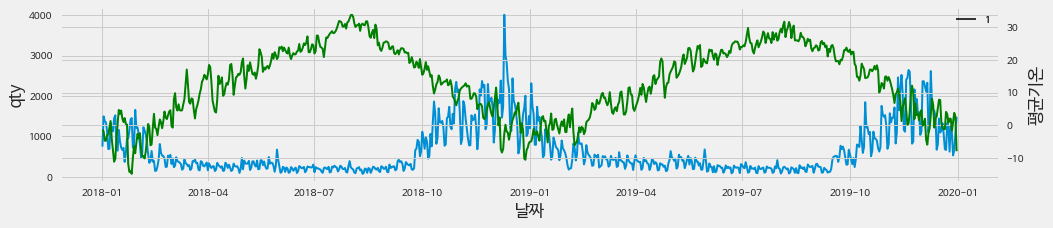

<Figure size 576x396 with 0 Axes>

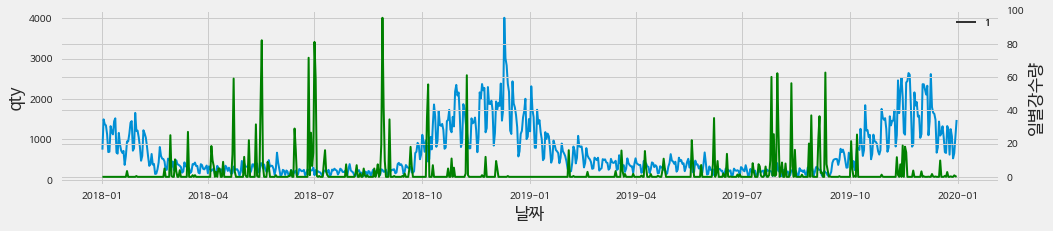

<Figure size 576x396 with 0 Axes>

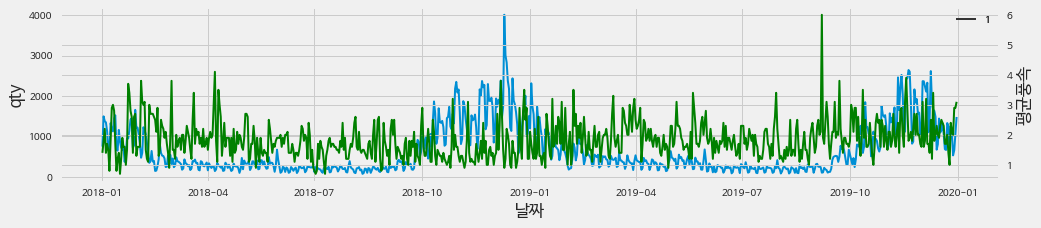

<Figure size 576x396 with 0 Axes>

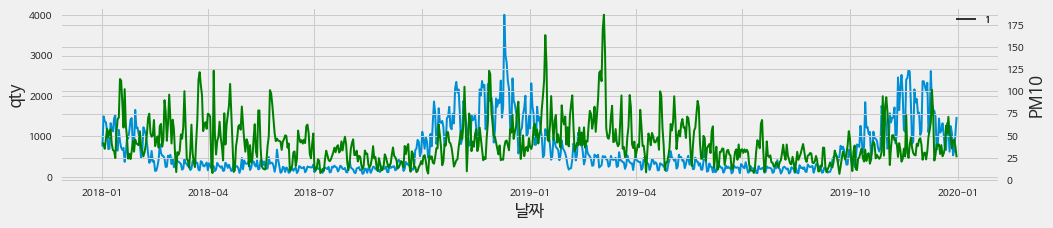

<Figure size 576x396 with 0 Axes>

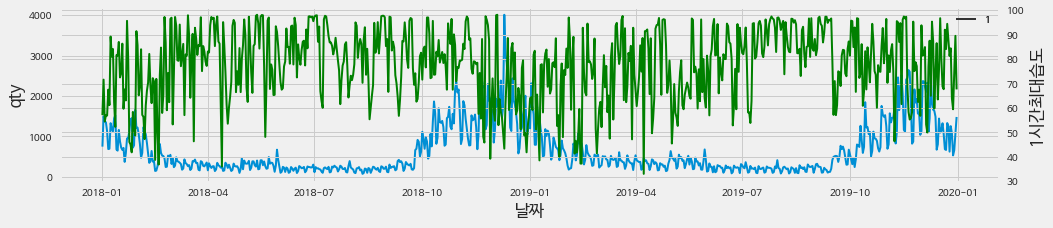

<Figure size 576x396 with 0 Axes>

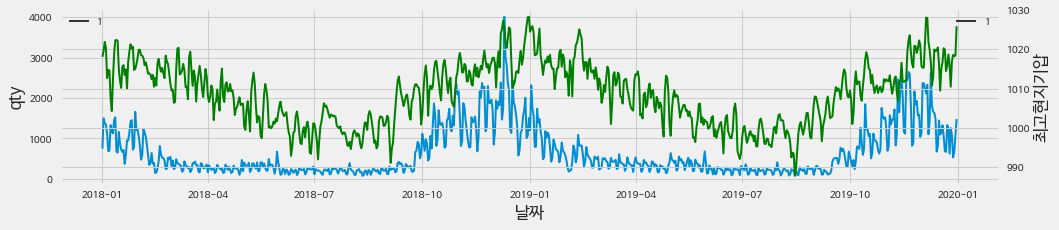

In [11]:
weather_qty_graph('서울', 0)

<Figure size 576x396 with 0 Axes>

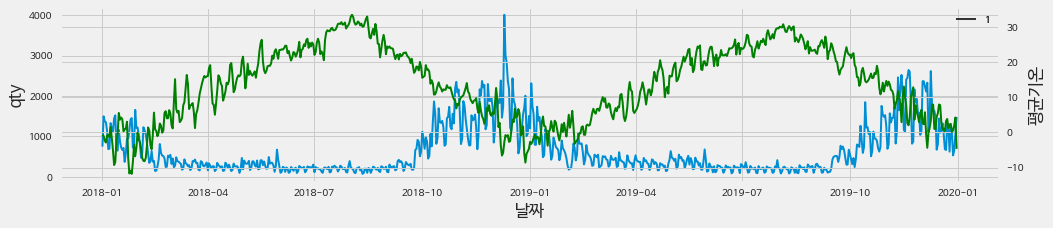

<Figure size 576x396 with 0 Axes>

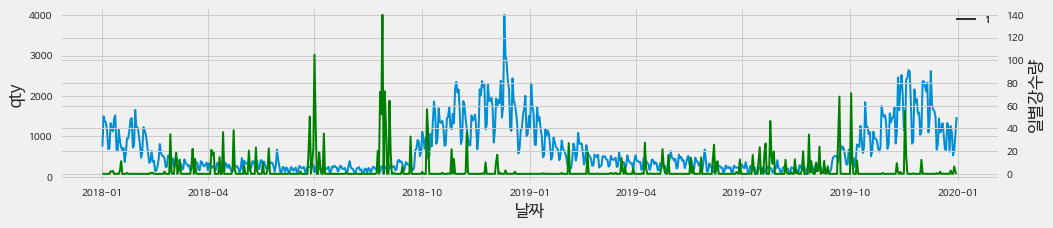

<Figure size 576x396 with 0 Axes>

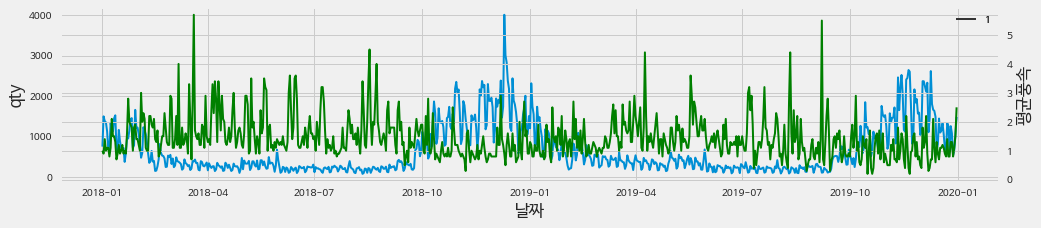

<Figure size 576x396 with 0 Axes>

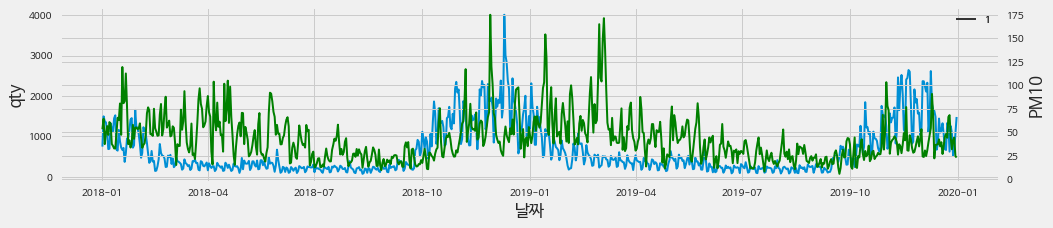

<Figure size 576x396 with 0 Axes>

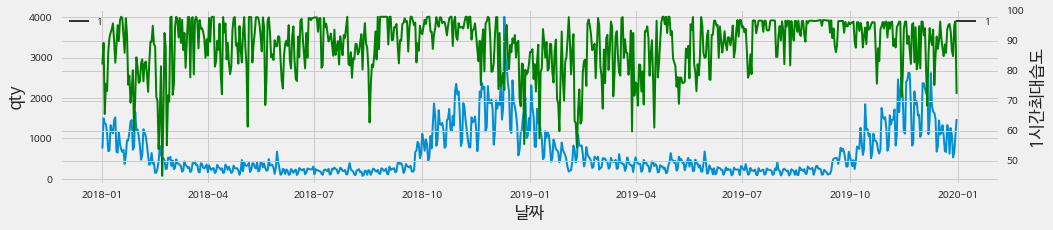

<Figure size 576x396 with 0 Axes>

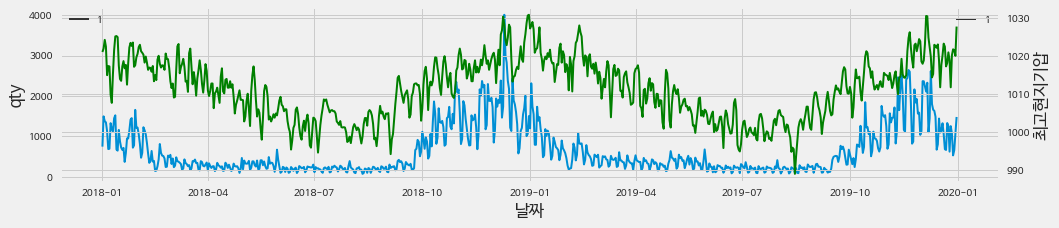

In [12]:
weather_qty_graph('대전', 0)

<Figure size 576x396 with 0 Axes>

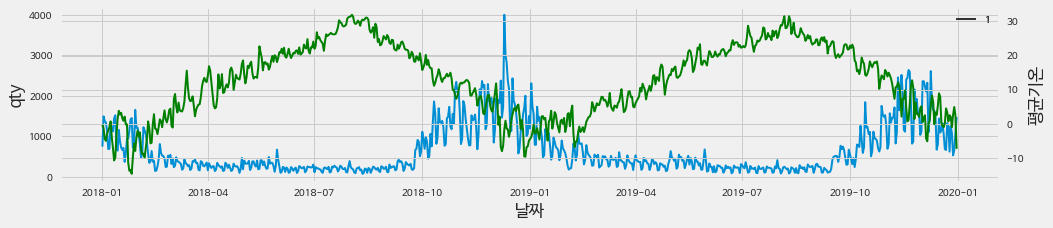

<Figure size 576x396 with 0 Axes>

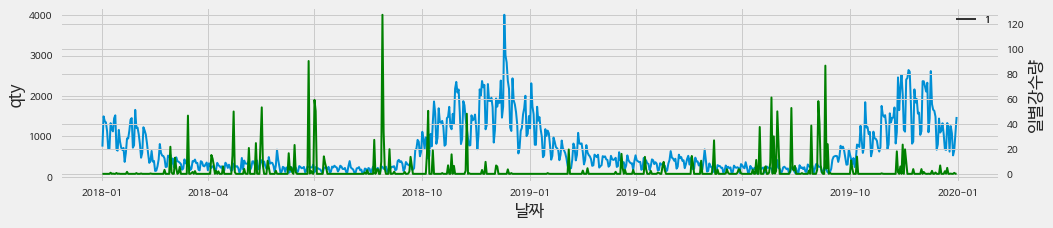

<Figure size 576x396 with 0 Axes>

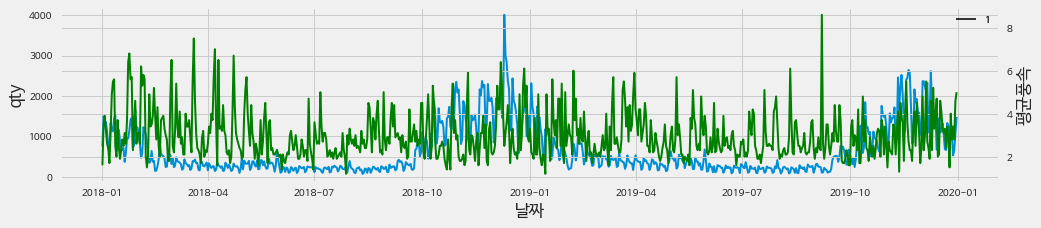

<Figure size 576x396 with 0 Axes>

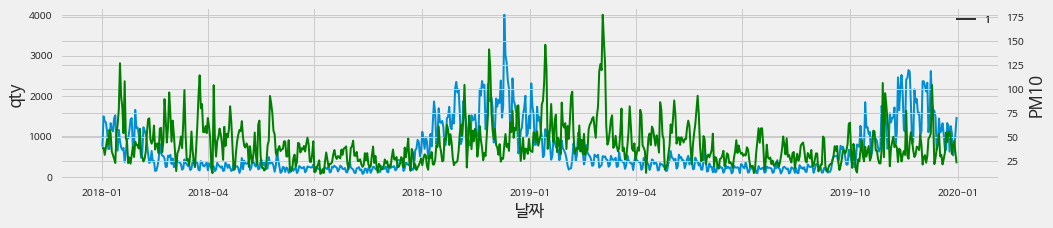

<Figure size 576x396 with 0 Axes>

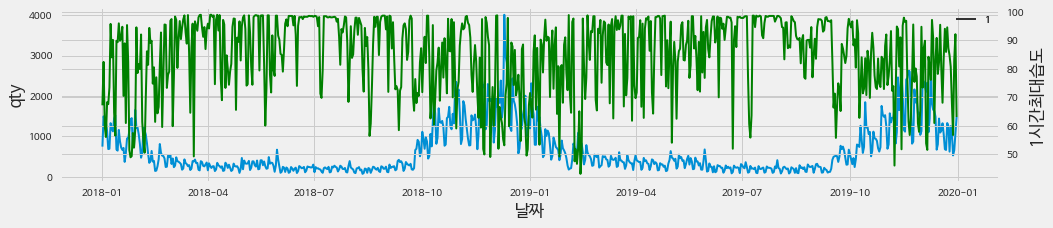

<Figure size 576x396 with 0 Axes>

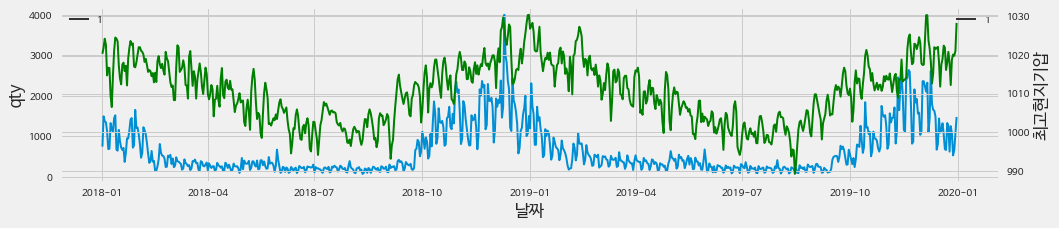

In [13]:
weather_qty_graph('인천', 0)

# 2. Cluster1 : 여름 클러스터 

* 대구, 강릉: 평균기온과 상관계수 0.26 이상

In [26]:
display_weather_correlation(cluster_buy_df(1))

강릉        인천        수원        안동        울산        제주  \
평균기온      0.268800  0.201022  0.222974  0.253612  0.242902  0.176041   
최고기온      0.275829  0.213749  0.251927  0.274802  0.264823  0.184665   
최저기온      0.245718  0.199937  0.199290  0.210509  0.205773  0.162527   
일별강수량    -0.040178 -0.011694  0.006992 -0.038375 -0.029153 -0.069593   
1시간최대강수량 -0.024445 -0.029152 -0.003549 -0.023694 -0.037669 -0.077040   
평균풍속     -0.017723 -0.145348 -0.067677 -0.013237 -0.117078 -0.115800   
PM10      0.367666  0.271563  0.328287  0.224221  0.251358  0.206311   
PM25      0.380692  0.321438  0.328856  0.170688  0.305699  0.278426   
1시간최대습도   0.045981  0.231662  0.137987  0.077010  0.123082  0.049000   
일조시간합     0.140550  0.058397  0.060910  0.159338  0.184907  0.241984   
최고현지기압   -0.267883 -0.239093 -0.234557 -0.241741 -0.238247 -0.215041   
체감온도      0.264728  0.205358  0.223465  0.248007  0.243811  0.181040   
열지수       0.266939  0.204225  0.224770  0.253432  0.243135  0.177929   

                천안        청주        대구        창원        여수        부산  \
평균기온      0.235732  0.241622  0.261449  0.226312  0.204947  0.213839   
최고기온      0.260870  0.257101  0.281873  0.252903  0.220288  0.222819   
최저기온      0.197879  0.216653  0.219563  0.192011  0.190795  0.201863   
일별강수량    -0.014320 -0.010681 -0.048497 -0.038977 -0.027235 -0.035835   
1시간최대강수량 -0.011362  0.003447 -0.022999 -0.049989 -0.012262 -0.058542   
평균풍속     -0.050572 -0.030300 -0.063929 -0.070178 -0.157877  0.028474   
PM10      0.274205  0.259538  0.202534  0.212043  0.228259  0.232612   
PM25      0.287725  0.248677  0.231348  0.266153  0.254435  0.273038   
1시간최대습도   0.004031 -0.022413  0.022689  0.188205  0.146815  0.108559   
일조시간합     0.109468  0.117290  0.131234  0.145108  0.167399  0.160338   
최고현지기압   -0.239263 -0.235616 -0.242622 -0.230177 -0.219918 -0.225081   
체감온도      0.235045  0.241952  0.257236  0.228530  0.208429  0.208086   
열지수       0.236830  0.242663  0.261106  0.227798  0.207251  0.215786   

                서울        광주        전주        대전  
평균기온      0.233600  0.226464  0.221238  0.240368  
최고기온      0.244111  0.253464  0.245144  0.256018  
최저기온      0.220904  0.195083  0.193975  0.210822  
일별강수량     0.012304 -0.065093 -0.051149 -0.055723  
1시간최대강수량  0.012834 -0.048736 -0.029351 -0.050942  
평균풍속     -0.056603 -0.012081 -0.004710 -0.014132  
PM10      0.314411  0.283009  0.228381  0.256971  
PM25      0.344788  0.299637  0.223362  0.282042  
1시간최대습도   0.062071  0.109945  0.121235 -0.010710  
일조시간합     0.049206  0.131841  0.116029  0.110633  
최고현지기압   -0.242530 -0.221936 -0.225966 -0.236986  
체감온도      0.231276  0.226865  0.216731  0.237232  
열지수       0.235132  0.226947  0.222427  0.241186

<Figure size 576x396 with 0 Axes>

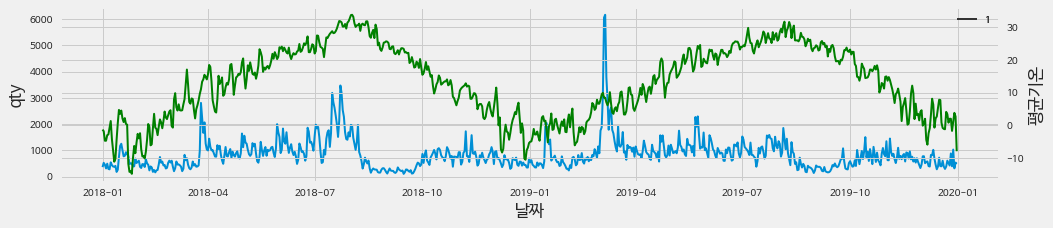

<Figure size 576x396 with 0 Axes>

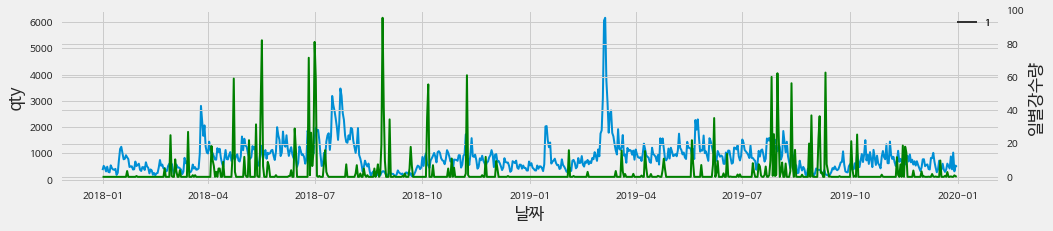

<Figure size 576x396 with 0 Axes>

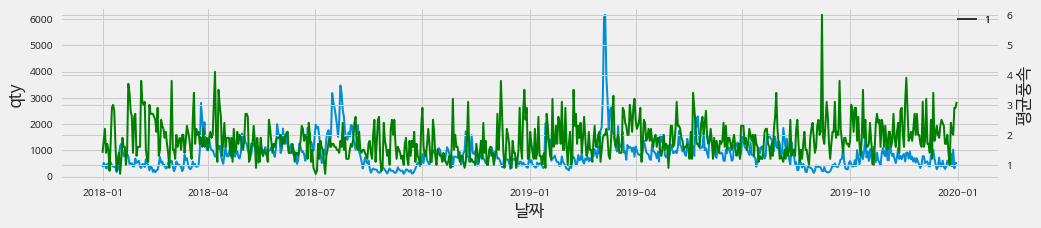

<Figure size 576x396 with 0 Axes>

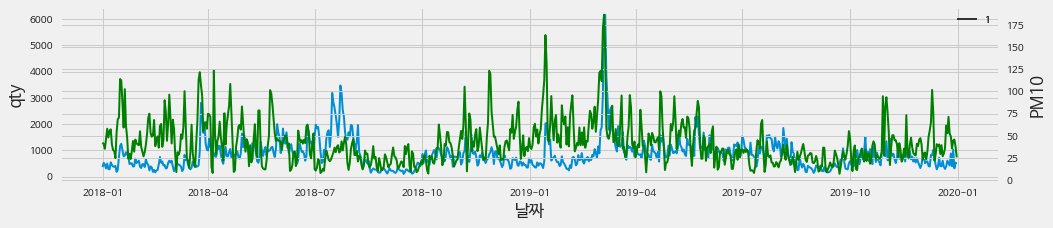

<Figure size 576x396 with 0 Axes>

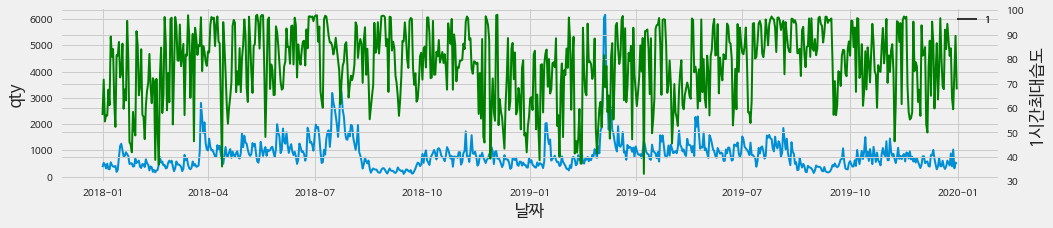

<Figure size 576x396 with 0 Axes>

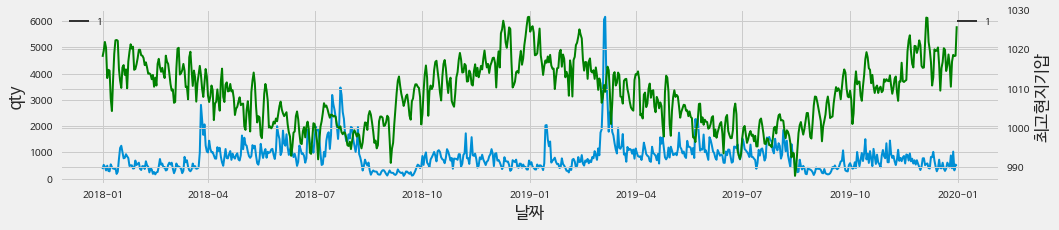

In [14]:
weather_qty_graph('서울', 1)

<Figure size 576x396 with 0 Axes>

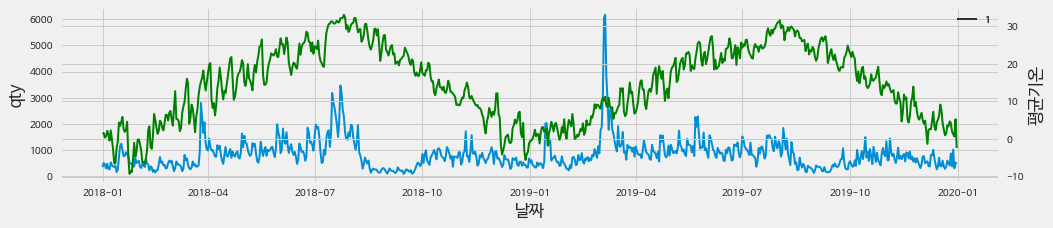

<Figure size 576x396 with 0 Axes>

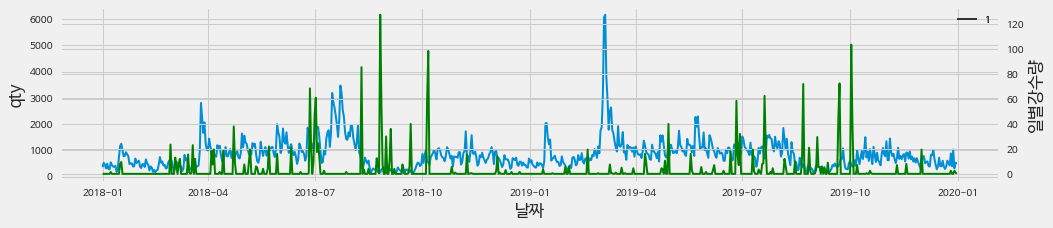

<Figure size 576x396 with 0 Axes>

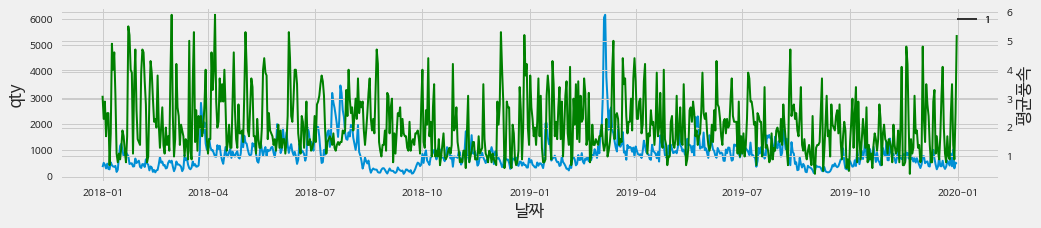

<Figure size 576x396 with 0 Axes>

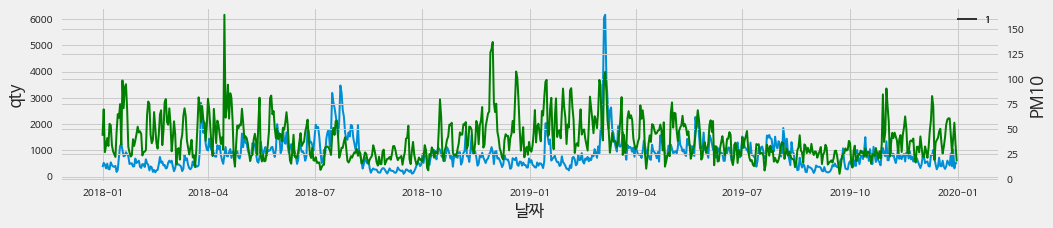

<Figure size 576x396 with 0 Axes>

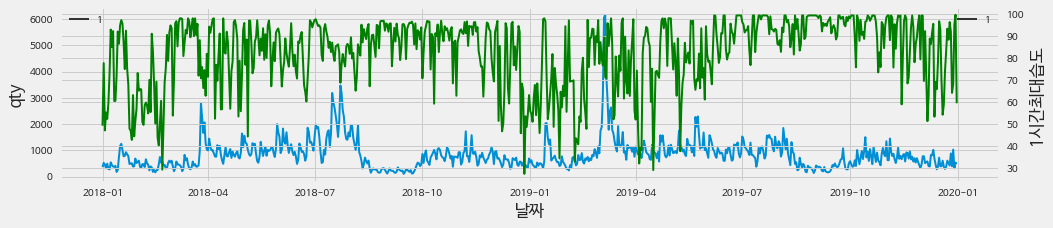

<Figure size 576x396 with 0 Axes>

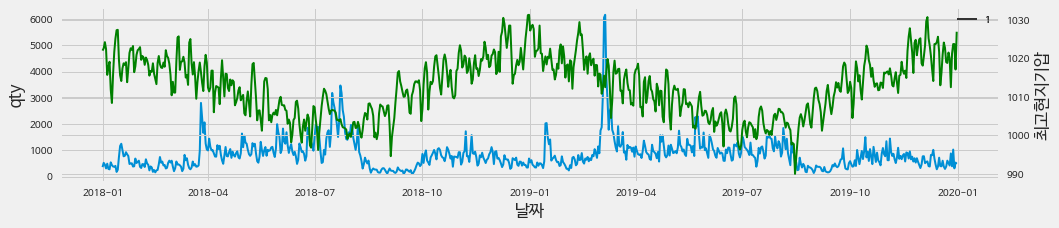

In [15]:
weather_qty_graph('대구', 1)

<Figure size 576x396 with 0 Axes>

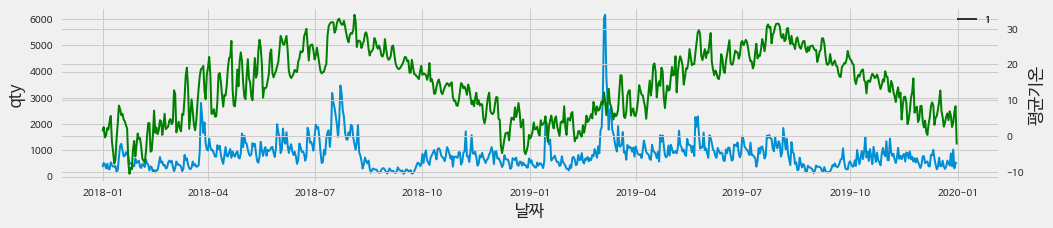

<Figure size 576x396 with 0 Axes>

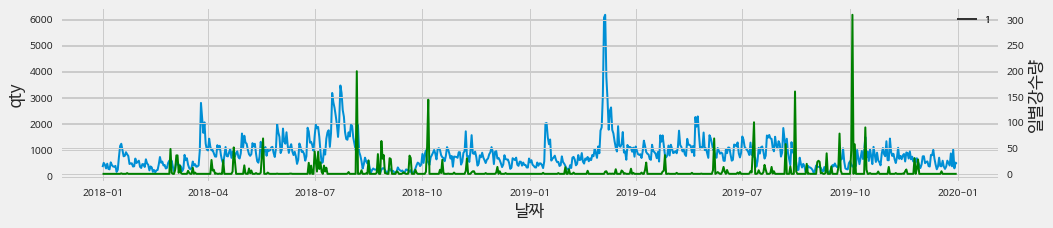

<Figure size 576x396 with 0 Axes>

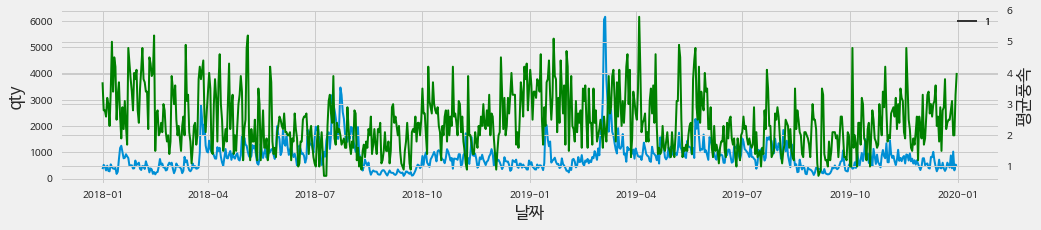

<Figure size 576x396 with 0 Axes>

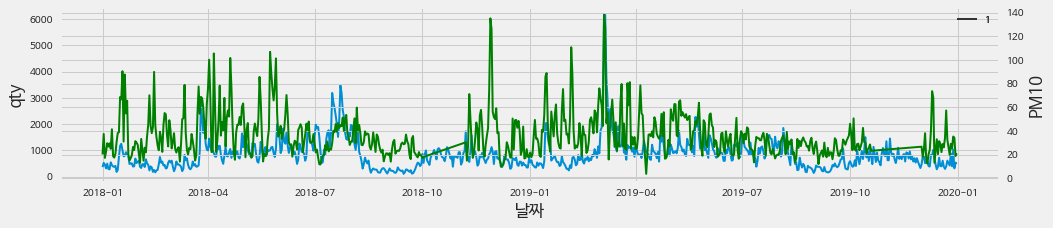

<Figure size 576x396 with 0 Axes>

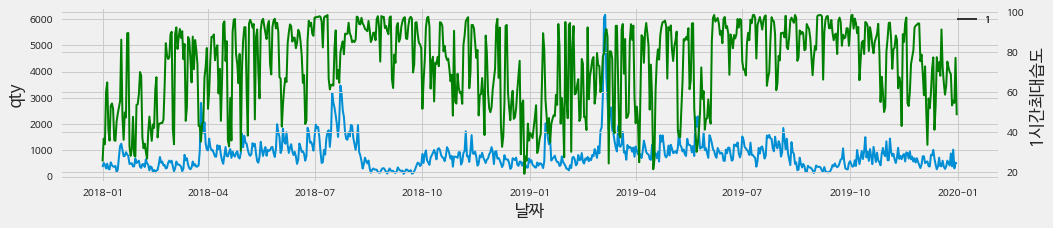

<Figure size 576x396 with 0 Axes>

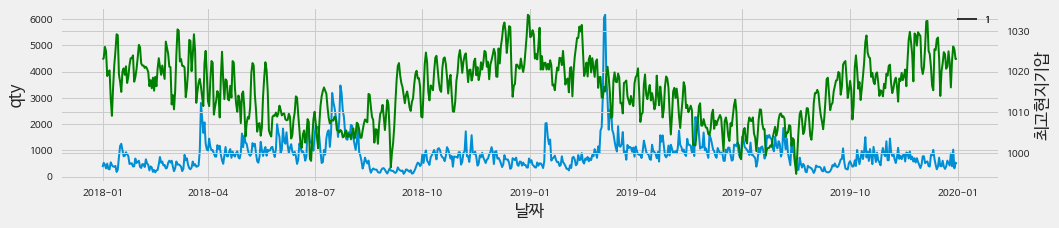

In [16]:
weather_qty_graph('강릉', 1)

# 3. Cluster2 : 결측치 많은 클러스터

* 여수, 전주: 최저기온과 상관계수 0.28 이상

In [27]:
display_weather_correlation(cluster_buy_df(2))

강릉        인천        수원        안동        울산        제주  \
평균기온     -0.245986 -0.277115 -0.268380 -0.246346 -0.252270 -0.283483   
최고기온     -0.232398 -0.268461 -0.246304 -0.236408 -0.235251 -0.268907   
최저기온     -0.256370 -0.276676 -0.276036 -0.260804 -0.265556 -0.292978   
일별강수량    -0.012254  0.042425  0.091119  0.027792  0.026740 -0.063738   
1시간최대강수량  0.004491  0.019187  0.085250  0.015336  0.023279 -0.082325   
평균풍속      0.097496  0.006449 -0.058545  0.040718  0.092743  0.005492   
PM10      0.158097  0.227419  0.248206  0.206045  0.170311  0.175022   
PM25      0.206685  0.240578  0.247092  0.214208  0.167993  0.182896   
1시간최대습도  -0.189522  0.010367  0.015905 -0.126041 -0.139768 -0.113895   
일조시간합     0.070388 -0.033799 -0.013878  0.019075  0.034610 -0.027089   
최고현지기압    0.155894  0.186932  0.199800  0.170419  0.178665  0.207047   
체감온도     -0.238524 -0.257436 -0.260502 -0.246875 -0.248571 -0.264586   
열지수      -0.243121 -0.271334 -0.263675 -0.242126 -0.248332 -0.280480   

                천안        청주        대구        창원        여수        부산  \
평균기온     -0.255134 -0.256787 -0.240490 -0.259454 -0.276049 -0.272689   
최고기온     -0.242505 -0.242828 -0.227376 -0.243422 -0.268603 -0.267306   
최저기온     -0.260998 -0.266144 -0.255162 -0.265816 -0.282579 -0.277141   
일별강수량     0.035391  0.045890 -0.009923  0.009196 -0.001487 -0.005914   
1시간최대강수량  0.025484  0.016313  0.037337  0.003259  0.007785 -0.025169   
평균풍속     -0.005372 -0.022236  0.031089  0.034013  0.015444  0.040064   
PM10      0.257775  0.247584  0.213619  0.190591  0.174474  0.202628   
PM25      0.236438  0.236466  0.198689  0.183880  0.185904  0.199905   
1시간최대습도  -0.135842 -0.066415 -0.159712 -0.111102 -0.105388 -0.144376   
일조시간합    -0.038719 -0.022234  0.020566  0.039025 -0.004744  0.029565   
최고현지기압    0.186023  0.191588  0.182660  0.191541  0.197087  0.190946   
체감온도     -0.253242 -0.255778 -0.236436 -0.255166 -0.252382 -0.271435   
열지수      -0.251047 -0.252222 -0.236465 -0.254964 -0.271477 -0.267932   

                서울        광주        전주        대전  
평균기온     -0.259809 -0.263202 -0.266843 -0.255563  
최고기온     -0.250225 -0.245529 -0.249981 -0.246547  
최저기온     -0.263629 -0.276259 -0.280620 -0.266579  
일별강수량     0.055193 -0.037163 -0.001154  0.039327  
1시간최대강수량  0.030894 -0.027367 -0.006217  0.030710  
평균풍속     -0.007966  0.017494  0.053819 -0.009993  
PM10      0.252638  0.241234  0.229472  0.268585  
PM25      0.249053  0.237903  0.216482  0.250147  
1시간최대습도  -0.077516 -0.117619 -0.116535 -0.127298  
일조시간합    -0.019779 -0.006304 -0.015726 -0.027289  
최고현지기압    0.184346  0.201885  0.201764  0.192899  
체감온도     -0.252643 -0.260131 -0.265090 -0.256252  
열지수      -0.254395 -0.259524 -0.262664 -0.251216

<Figure size 576x396 with 0 Axes>

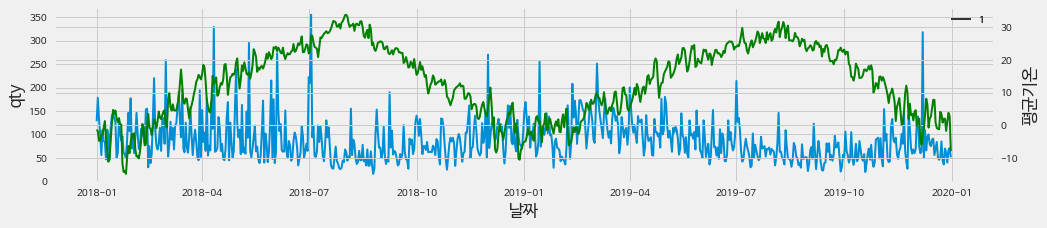

<Figure size 576x396 with 0 Axes>

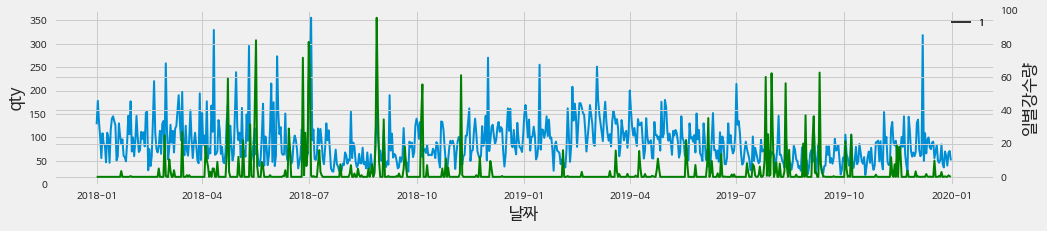

<Figure size 576x396 with 0 Axes>

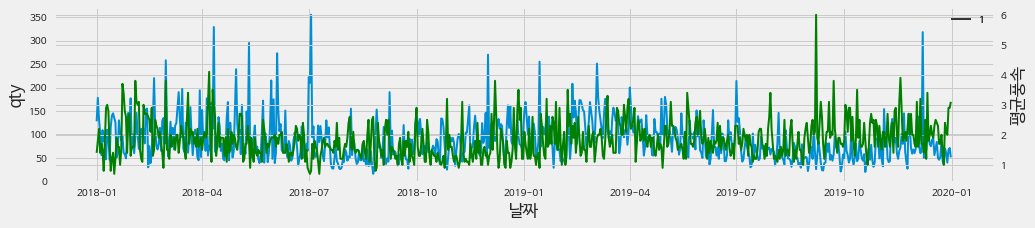

<Figure size 576x396 with 0 Axes>

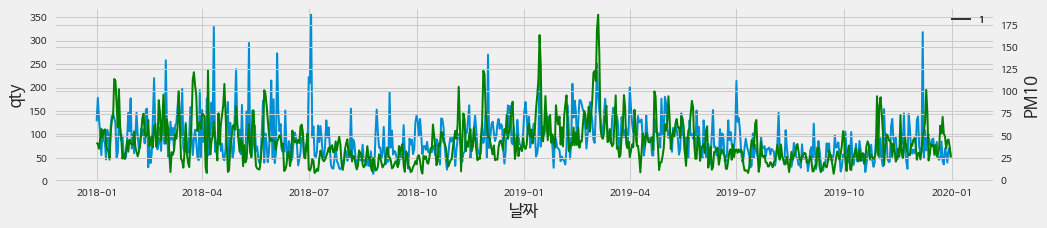

<Figure size 576x396 with 0 Axes>

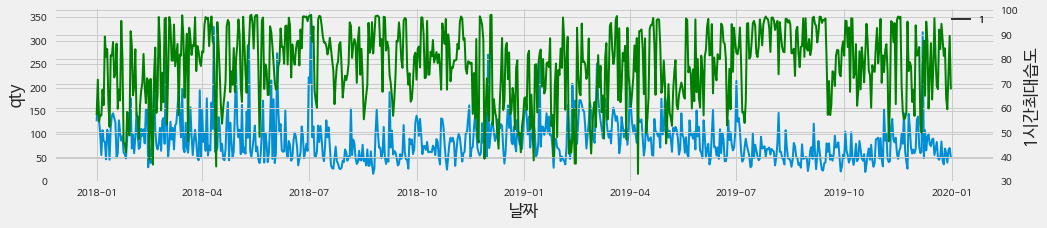

<Figure size 576x396 with 0 Axes>

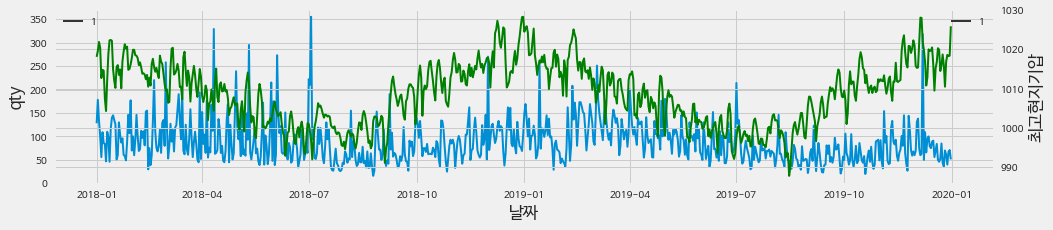

In [17]:
weather_qty_graph('서울', 2)

<Figure size 576x396 with 0 Axes>

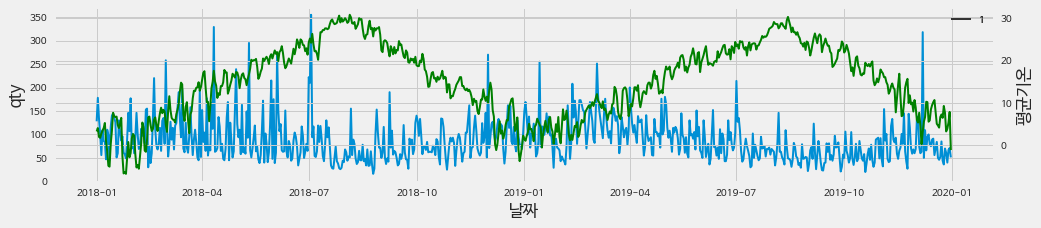

<Figure size 576x396 with 0 Axes>

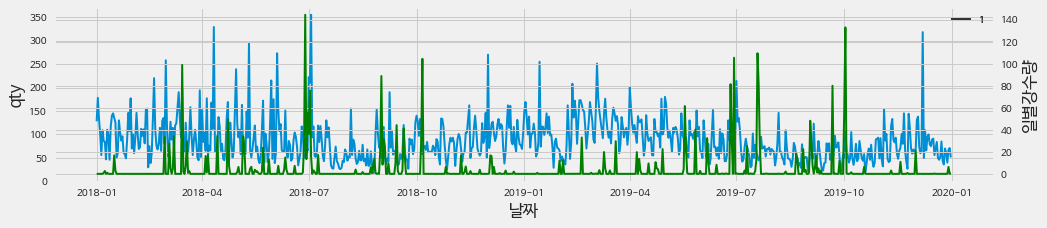

<Figure size 576x396 with 0 Axes>

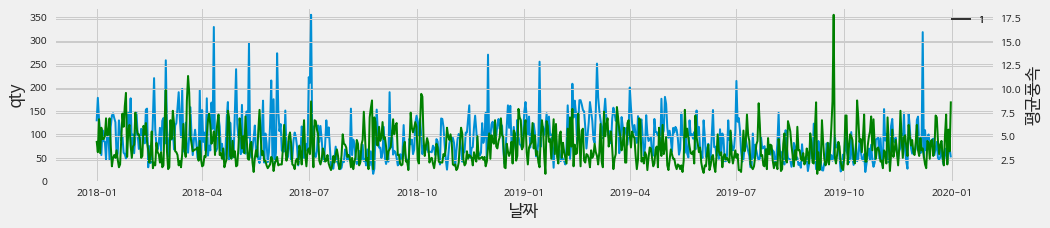

<Figure size 576x396 with 0 Axes>

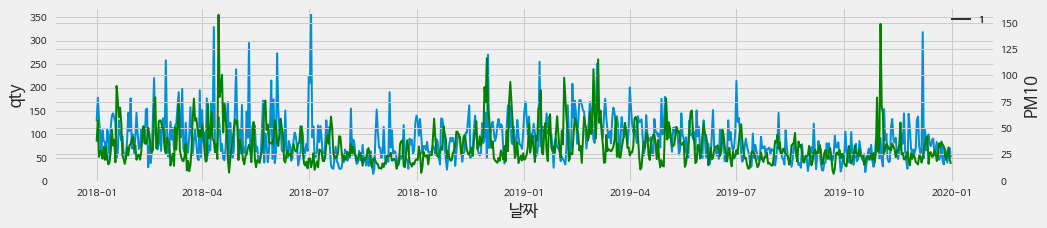

<Figure size 576x396 with 0 Axes>

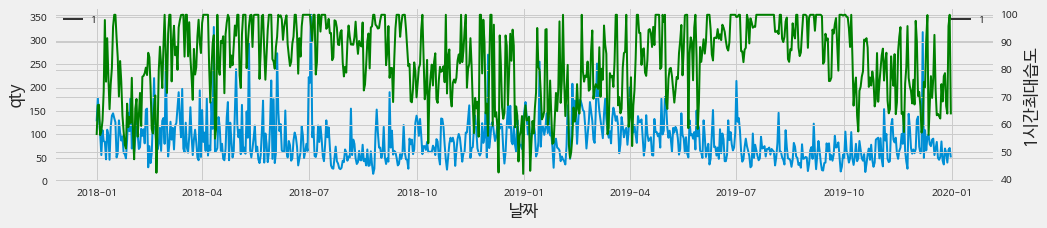

<Figure size 576x396 with 0 Axes>

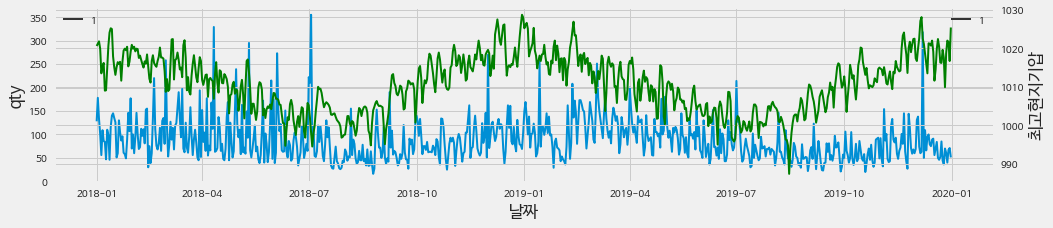

In [18]:
weather_qty_graph('여수', 2)

<Figure size 576x396 with 0 Axes>

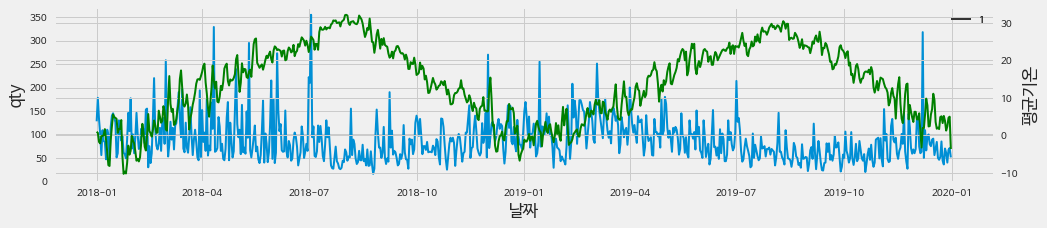

<Figure size 576x396 with 0 Axes>

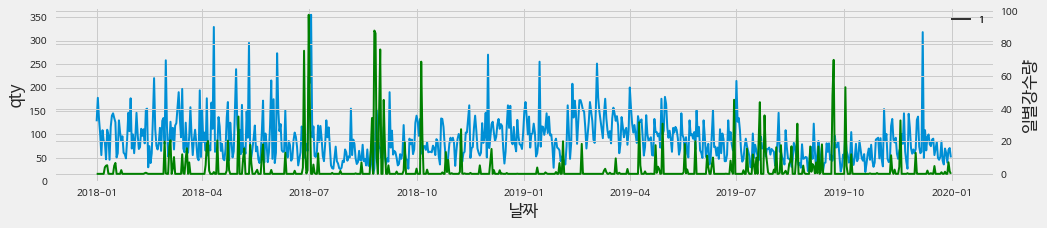

<Figure size 576x396 with 0 Axes>

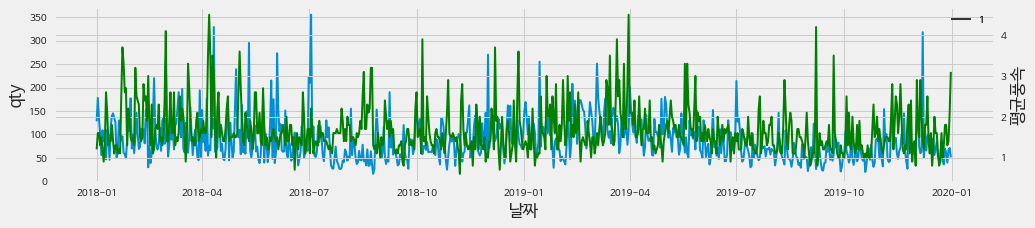

<Figure size 576x396 with 0 Axes>

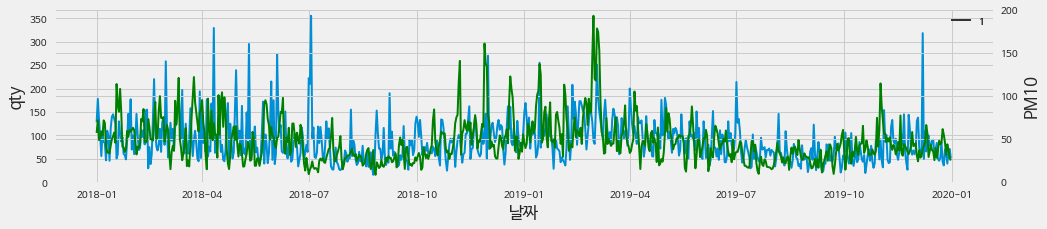

<Figure size 576x396 with 0 Axes>

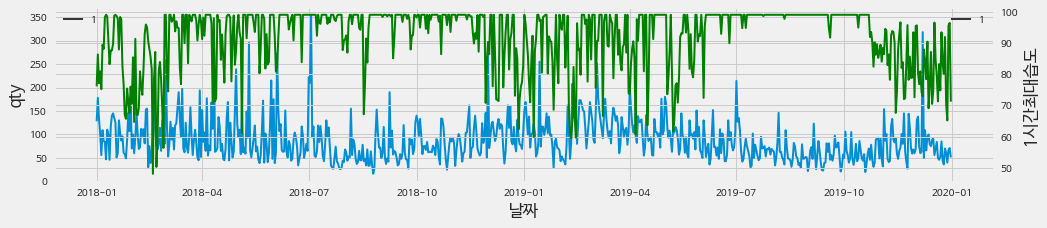

<Figure size 576x396 with 0 Axes>

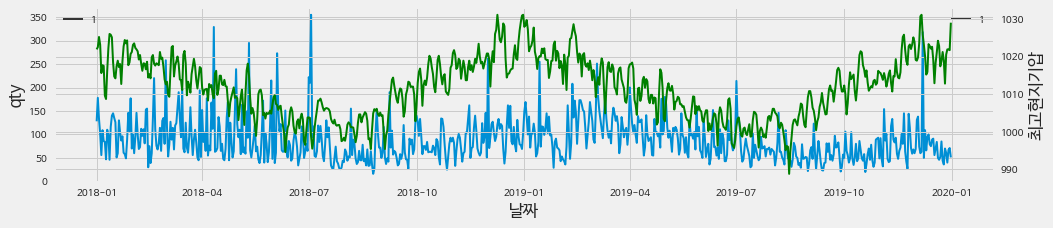

In [19]:
weather_qty_graph('전주', 2)